## 7.1 - *Adult* [dataset](https://archive.ics.uci.edu/ml/datasets/Adult)

En este primer ejercicio, vamos a ver cómo cargar unos datos obtenidos de una página web (la UCI, en este caso). Tenemos que descargar dos archivos: ```adult.data```, donde están los datos que queremos analizar (lo que se conoce como los "datos en bruto" o "raw data"), y ```adult.names```, donde se nos ofrece información variada sobre el estudio y, entre otras cosas, los nombres de las variables y sus valores.

La dificultad de este ejercicio radica en que tenemos que localizar y extraer los nombres del archivo que contiene los nombres de las variables (las columnas) y añadírselos a los datos para poder construir un DataFrame completo.

Iré añadiendo explicaciones según sea conveniente para aclarar cómo funcionan algunas partes del código, pero pueden ser eliminadas todas las líneas que empiezan por # sin problema

### Carga y Preprocesamiento de los datos


In [1]:
# Librerías
import os # Para obtener el directorio activo
import requests # Para descargar ficheros
import re
import pandas as pd
import numpy as np

Nota: Si este Notebook en general (o este bloque de código siguiente en particular) se ejecutan varias veces, se crearán sucesivamente carpetas "adult_dataset". Por lo que podría ser interesante incluir algún condicional para que no lo haga si ya existe en el directorio. Quizá con un comando presente en el ejercicio 2 ```(os.makedirs('', exist_ok=True))``` podamos resolver esto.

El siguiente bloque parece denso, pero es por incluir muchas explicaciones de las líneas más complicadas de entender.

In [11]:
# Creamos una carpeta para que contenga a nuestro dataset
!mkdir adult_dataset # Esto debería crearnos una carpeta dentro de nuestro directorio activo llamada "adult_dataset"

# Movemos el directorio activo a esa localización
os.chdir("adult_dataset") ## OJO! Salvo indicación contraria, todo lo que se genere y se guarde a partir de esta línea se guardará aquí.

# Obtenemos los enlaces a los ficheros que queremos descargar
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'

# Descargamos los ficheros
response_data = requests.get(url_data)
response_names = requests.get(url_names)

# Guardamos los archivos descargados
with open('adult.data', 'wb') as f:
    f.write(response_data.content)

with open('adult.names', 'wb') as f:
    f.write(response_names.content)

# Leemos datos
with open(os.path.join(os.getcwd(),'adult.data'),'r') as f: # "Leemos" el archivo adult.data
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías

# Leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f: # "Leemos" el archivo adult.names
    metadata = f.read().splitlines() # Dividimos el texto por saltos de línea

# Regex
# Lo que creamos a continuación puede entenderse como una condición para buscar un patrón de caracteres en un texto
## En este caso, buscamos palabras que empiecen por letras mayús. o minús. (^[a-zA-Z-]), de duración variable (+) y que tengan dos puntos (:{1})
regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)  
## Buscamos palabras con letras mayús. o minús. de duración variable
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)  

# Aplicamos la expresión regular en forma de lambda al metadata
# Téngase en cuenta que el método findall devuelve una lista vacía si ninguna expresión coincide con el patrón introducido


# Explicación detallada de la siguiente línea de código:
## Leyendo de derecha a izquierda el siguiente código: regex_fn busca las filas de adult_names que empiecen por letras y dos puntos. Como el método
# re.findall devuelve una lista vacía si una fila de adult_names no empieza por esos caracteres, si le aplicamos un if antes, en aquellas filas en las que
# haya una lista vacía obtendremos un "if False", y no pasará nada, y un "if True" si la fila empieza por esos caracteres. Pues en aquellos casos en los que
# regen_fx sea True (las filas con los nombres de las variables), se hará lo siguiente: coges el primer elemento de regen_fx por cada elemento en metadata
# (es decir, en adult_names) y lo metes en una lista llamada metadata_list. 

# Dicho con otras palabras, con regen_fx tenemos una lista (A) conformada por mini-listas. Cada mini-lista contiene la fila de adult_names que empieza por 
# letras y dos puntos. Con la línea de código, creamos una lista (B) llamada "metadata_list", cogemos el primer elemento de cada mini-lista y lo metemos 
# dentro de la lista B. Pasamos de tener una lista de listas, a una única lista con strings. 
metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
    # Nota: si pedimos un print(metadata_list), obtendremos lo siguiente:
    # Ya existe el subdirectorio o el archivo adult_dataset.
    # Error mientras se procesaba: adult_dataset.
    # ['age:', 'workclass:', 'fnlwgt:', 'education:', 'education-num:', 'marital-status:', 'occupation:', 'relationship:',
    # 'race:', 'sex:', 'capital-gain:', 'capital-loss:', 'hours-per-week:', 'native-country:']
    # Con esto podemos comprobar que, efectivamente, hemos extraído los nombres de adult_names y las hemos guardado en una lista de strings.

# Siguiendo el razonamiento anterior, pasamos de tener una lista de listas a una lista de strings, con la diferencia de que la condición que estamos usando
# es distinta, pues ahora no estamos pidiendo que empiecen por letras y dos puntos, sino que simplemente tengan letras. Con ["label"] lo que hacemos es
# añadir un string más a la lista "col_names" con el nombre "label". Con esta línea, en definitiva, le estamos quitando los dos puntos a las palabras.
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']
    # Ahora, si pedimos un print de col_names, aparte de las dos primeras líneas de error, obtendremos lo siguiente:
    # ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
    # 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']
    # Hemos quitado los ":" exitosamente, además de añadir la variable "label" al final de la lista.

# Con los nombres de las columnas obtenidos, construimos el objeto pd.DataFrame
df_ADULT = pd.DataFrame(data=data, columns=col_names)
df_ADULT

Ya existe el subdirectorio o el archivo adult_dataset.
Error mientras se procesaba: adult_dataset.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Incluso, por estética, podríamos escribir los nombres de las columnas en mayúscula, aunque el resto del código está preparado con las variables en minúsculas y habría que modificarlo.

In [25]:
DF_MAYUS = pd.DataFrame(data=data, columns=[name.capitalize() for name in col_names])
DF_MAYUS

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Comenzamos el análisis de los datos buscando su información general

In [3]:
df = df_ADULT.copy() # Copiamos el dataframe para no modificar el original y trabajar con una variable de nombre corto.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


Como se puede apreciar, todas las columnas son de "Dtype: object", lo que quiere decir que probablemente sean strings, cosa que no tiene sentido, por ejemplo, para la edad. De hecho, si vamos a la fuente, observaremos lo siguiente:

Descripción de las variables:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Por lo pronto, vamos a ver el aspecto de los primeros datos

In [4]:
df.head() # 6 de las columnas deben ser numéricas tal y como está indicado en adult.names (continuous)
# Estas variables son: age, fnlwgt, education-num, capital-gain, capital-loss y hours-per-week.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Recordatorio: una forma de hacerlo directamente con **todas** las variables que se pueda es la siguiente:

```python
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

df.info()
```

In [5]:
# Transformación del tipo de las variables a numérico:

df["age"] = df["age"].astype(int)
df["fnlwgt"] = df["fnlwgt"].astype(int)
df["education-num"] = df["education-num"].astype(int)
df["capital-gain"] = df["capital-gain"].astype(int)
df["capital-loss"] = df["capital-loss"].astype(int)
df["hours-per-week"] = df["hours-per-week"].astype(int)

# Finalmente, comprobamos que las variables son números ahora:
df.info()

# Obtenemos un error porque uno de los valores, además de ser un string, es un string vacío, por lo que no puede ser transformado a int.
# ValueError: invalid literal for int() with base 10: ''

ValueError: invalid literal for int() with base 10: ''

Vamos entonces a estudiar los valores nulos de las variables

In [26]:
df["age"].unique() # Se puede ver que uno de los valores es un vacío, por lo que no vamos a poder convertir los datos de string a número.

array(['39', '50', '38', '53', '28', '37', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '35', '59', '56', '19',
       '20', '45', '22', '48', '21', '24', '57', '44', '41', '29', '18',
       '47', '46', '36', '79', '27', '67', '33', '76', '17', '55', '61',
       '70', '64', '71', '68', '66', '51', '58', '26', '60', '90', '75',
       '65', '77', '62', '63', '80', '72', '74', '69', '73', '81', '78',
       '88', '82', '83', '84', '85', '86', '87', ''], dtype=object)

In [27]:
df["age"].isnull().value_counts() # Vemos que no hay valores nulos, sino un string vacío, asi que vamos a corregir esto

age
False    32562
Name: count, dtype: int64

In [28]:
df["age"] #Parece que es el último dato el que falla, vamos a ver las últimas filas 

0        39
1        50
2        38
3        53
4        28
         ..
32557    40
32558    58
32559    22
32560    52
32561      
Name: age, Length: 32562, dtype: object

In [29]:
df.tail() # En efecto, en la base de datos hay una fila extra vacía que provoca fallos y no aporta información, así que vamos a borrarla.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K
32561,,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [30]:
#Para borrar la última fila, podemos hacer lo siguiente:
df.index[-1] # Nos da el índice de la fila del final, comprobamos que es la 32561
df = df.drop(df.index[32561]) # Borramos la fila del final, la 32561
df.tail()

# Este código solo va a funcionar una vez pues la fila 32561 ya no existe, pero si indicásemos la fila del final con un -1, se borraría la última fila
# constantemente al ejecutar este comando.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [31]:
# Transformación del tipo de las variables a numérico:

df["age"] = df["age"].astype(int)
df["fnlwgt"] = df["fnlwgt"].astype(int)
df["education-num"] = df["education-num"].astype(int)
df["capital-gain"] = df["capital-gain"].astype(int)
df["capital-loss"] = df["capital-loss"].astype(int)
df["hours-per-week"] = df["hours-per-week"].astype(int)

# Finalmente, comprobamos que las variables son números ahora:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB


Hasta aquí, hemos eliminado todos los valores nulos, ahora hay que comprobar si los valores no-nulos son valores válidos o no.

In [32]:
# Una forma rápida y directa es con el siguiente comando:
for col in df.columns: # Para cada columna del dataframe:
    print(df[col].unique()) # Imprimimos los valores/categorías únicas de cada columna
    print("\n") # y un espacio de línea

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


[ 77516  83311 215646 ...  34066  84661 257302]


[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-

Una forma rápida de agrupar las variables es con el código que viene a continuación:  

```python
# Sacamos los nombres de las columnas numéricas y categóricas
def tipo_de_columnas_ordenadas (df):
    cat = []
    num = []
        
    for col in df.columns:
        if(df[col].dtype == "object"):
            cat.append(col)
        else:
            num.append(col)

    return cat , num

cat , num = tipo_de_columnas_ordenadas(df)
print("Las columnas categóricas son: ", cat)
print("Las columnas numéricas son: ", num)

# Es una buena forma de agrupar las variables según su tipo, especialmente cuando tenemos un número elevado de columnas, aunque requiere de una buena
# limpieza previa de los datos.
```

Vamos a estudiar los casos específicos de "workclass", "fnlwgt", "occupation" y "native-country"

In [33]:
df["workclass"].value_counts() # Hay 1836 valores que no tienen una "?" ..

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [36]:
df["workclass"].value_counts()/len(df["workclass"])*100 # .. lo que supone un 5.64% de los datos.

workclass
Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: count, dtype: float64

In [34]:
print(df.sort_values(by = "fnlwgt")) # En la columna fnlwgt no hay valores extraños como "?" ni cerca del mínimo ni del máximo, por lo que esta variable está bien

       age   workclass   fnlwgt      education  education-num  \
17096   25           ?    12285   Some-college             10   
27207   23     Private    13769   Some-college             10   
25743   46   Local-gov    14878    Prof-school             15   
24012   26     Private    18827   Some-college             10   
10826   25     Private    19214        HS-grad              9   
...    ...         ...      ...            ...            ...   
8258    35     Private  1226583      Bachelors             13   
15569   29     Private  1268339        HS-grad              9   
16739   45     Private  1366120      Assoc-voc             11   
18138   39     Private  1455435     Assoc-acdm             12   
14449   25     Private  1484705   Some-college             10   

               marital-status          occupation    relationship  \
17096           Never-married                   ?   Not-in-family   
27207      Married-civ-spouse   Machine-op-inspct         Husband   
25743      M

In [38]:
df["occupation"].value_counts() # Hay 1843 valores que no tienen valores de profesión ..

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [39]:
df["occupation"].value_counts()/len(df["occupation"])*100 # .. lo que supone un 5.66% de los datos.

occupation
Prof-specialty       12.714597
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Other-service        10.119468
Machine-op-inspct     6.148460
?                     5.660146
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: count, dtype: float64

In [40]:
df["native-country"].value_counts() # Hay 583 personas que no tienen país de origen ..

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [41]:
df["native-country"].value_counts()/len(df["native-country"])*100 # .. lo que supone un 1.79% de los datos.

native-country
United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                 

Vamos a eliminar entonces los datos indeterminados y sustituirlos por valores nulos

In [42]:
# Reemplazamos ' ?' (sí, con un espacio) por nulo
df = df.replace(' ?',np.NaN)

# Vemos qué columnas tienen datos faltantes
missing_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)

# Filtramos las filas donde hay algún dato nulo, y las columnas donde están
df.loc[df.isnull().sum(axis=1)>0, missing_cols]

,workclass,occupation,native-country
14,Private,Craft-repair,NaN
27,NaN,NaN,South
38,Private,Sales,NaN
51,Private,Other-service,NaN
61,NaN,NaN,NaN
...,...,...,...
32530,NaN,NaN,United-States
32531,NaN,NaN,United-States
32539,NaN,NaN,United-States
32541,NaN,NaN,United-States


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  31978 non-null  object
 14  label           32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB


Ahora tenemos valores nulos en Workclass, Occupation y Native-Country. ¿Qué podemos hacer con ellos? Al ser variables atributos (no numéricas, sino palabras, categóricas) la mejor opción es asignarles la moda a esos valores, que son "Private", "Prof-Specialty" y "USA", respectivamente.

Con la siguiente supermega función, reemplazamos todos los datos nulos por la media, moda o mediana según el tipo de dato automáticamente, y puede ser fácilmente ajustable a los datos que utilicemos, pues si queremos podemos cambiar el valor sustituto fácilmente.

```python
def replace_missing_data(df):
    # Vemos qué columnas tienen valores nulos
    mis_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
    # Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if df[col].dtype in ['object']:
            mode_col = df[col].mode().values[0]
            df[col] = df[col].fillna(mode_col)
        # Si son números enteros
        elif df[col].dtype in ['int']:
            df[col] = df[col].fillna(df['col'].median())
        # Si son números reales
        elif df[col].dtype in ['float']:
            df[col] = df[col].fillna(df['col'].mean())
    # Devolvemos el DataFrame
    return df
```

## IMPORTANTE:

Es importante tener en cuenta cuál es el peso de los datos nulos sobre el total de los datos para saber si seremos capaces o si sería responsable tomar la decisión de sustituir los datos faltantes a raíz de los existentes (podemos rellenar el 2% con el otro 98%, pero no podemos rellenar un 85% con un 15%).

In [44]:
def replace_missing_data(df):
    # Vemos qué columnas tienen valores nulos
    mis_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
    # Iteramos sobre ellas
    for col in mis_cols:
        # Si la variable es discreta,...
        if df[col].dtype in ['object']:
            mode_col = df[col].mode().values[0]
            df[col] = df[col].fillna(mode_col)
        # Si son números enteros
        elif df[col].dtype in ['int']:
            df[col] = df[col].fillna(df['col'].median())
        # Si son números reales
        elif df[col].dtype in ['float']:
            df[col] = df[col].fillna(df['col'].mean())
    # Devolvemos el DataFrame
    return df

replace_missing_data(df)
print(df.info()) # Hemos solucionado todos los errores nulos
df[["workclass", "occupation", "native-country"]][60:63] # Antes había problemas en workclass, occupation y native-country en la linea 61

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB
None


,workclass,occupation,native-country
60,Private,Sales,United-States
61,Private,Prof-specialty,United-States
62,Private,Transport-moving,United-States


Ya hemos corregido nuestra base de datos. Hemos eliminado celdas vacías y hemos sustituido los valores nulos por la moda de sus respectivas columnas al tratarse de variables atributo (palabras). Nuestra base de datos ya está lista para ser estudiada y analizada por los expertos 😎👌 (Que casualmente también somos nosotros 🤣)

Recordatorio: Código para discretizar variables:

```python
  # Tomamos el mínimo y máximo de los datos
  min_col, max_col = df['engine-size'].min(), df['engine-size'].max()
  # Decidimos en cuántas cajas vamos a estratificar los datos
  num_boxes = 8
  # Creamos los valores que segmentarán las cajas
  bins = np.linspace(min_col, max_col, num_boxes+1)
  # Creamos la columna discretizada
  df['engine-size-disc'] = np.digitize(df['engine-size'], bins)
```

### Análisis estadístico de los datos (Explayarse todo lo que uno quiera)

<Axes: >

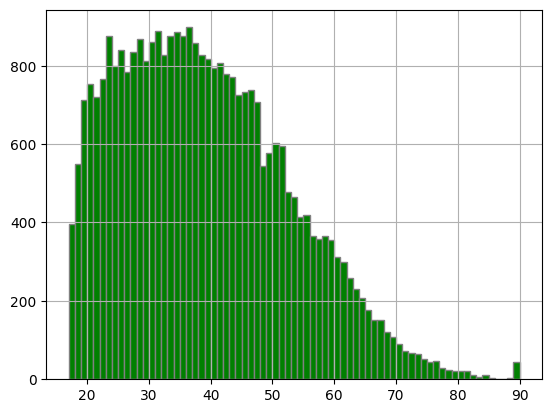

In [45]:
# Ejemplo: Intervalo de edad
intervalo_edad = df["age"].max()-df["age"].min()

#Histograma con la edad
df["age"].hist(bins = intervalo_edad, color = "green", edgecolor = "grey")